In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [2]:
def gen_seq_markov(alphabet, probs, seq_len):
    """ like sample_sequence_MM, but uses a numpy matrix, no start and end states, and a set sequence length
    """
    sequence = list(
        np.random.choice(alphabet, p=np.sum(probs, axis=0) / np.sum(probs), size=1)
    )
    for i in range(seq_len):
        sequence.append(np.random.choice(alphabet, p=probs[:, sequence[-1]], size=1)[0])
    return sequence

In [3]:
def gen_random_markov_seq(seq_len, nstates = 2):
    probs = np.random.rand((nstates**2)).reshape(nstates,nstates)**10
    probs = probs/np.sum(probs, axis=0)
    #plt.matshow(probs)
    #probs = np.array([[0.1, 0.9], [0.9, 0.1]])
    alphabet = np.arange(nstates)
    sequence = list(
        np.random.choice(alphabet, p=np.sum(probs, axis=0) / np.sum(probs), size=1)
    )
    for i in range(seq_len):
        sequence.append(np.random.choice(alphabet, p=probs[:, sequence[-1]], size=1)[0])
    return sequence

In [4]:
gen_random_markov_seq(5, nstates = 20)

[0, 11, 10, 14, 12, 7]

In [13]:
seq_lens = np.random.exponential(scale=100.0, size=10000).astype(int)
seq_lens = seq_lens[seq_lens>0]

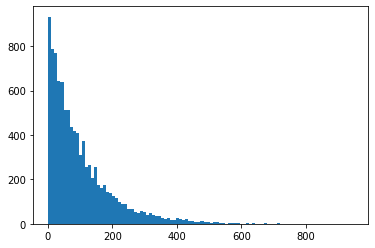

In [14]:
plt.hist(seq_lens, bins=100);

In [15]:
all_seqs = [gen_random_markov_seq(seq_len, nstates=20) for seq_len in tqdm(seq_lens)]

In [16]:
len(np.concatenate(all_seqs))

1010899

In [21]:
distances = np.unique(np.logspace(0, 3, 100, base=10).astype('int'))

In [22]:
from childes_mi.information_theory import mutual_information as mi

In [23]:
# original model
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    [np.concatenate(all_seqs)], distances=distances, n_jobs=-1
)
MI_DF =  pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances, "no_markov"]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances", "shuffle"],
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 out of  75 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  44 out of  75 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.6s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  75 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  44 out of  75 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.8s finished


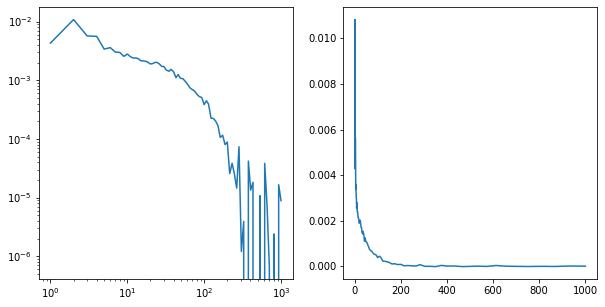

In [24]:
row = MI_DF.iloc[len(MI_DF)-1]
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

MI = row.MI-row.shuff_MI
ax = axs[0]
ax.plot(distances, MI)
ax.set_yscale('log')
ax.set_xscale('log')

ax = axs[1]
ax.plot(distances, MI)